In [8]:
using Judyp, VegaLite

┌ Info: Precompiling VegaLite [112f6efa-9a02-5b7d-90c0-432ed331239a]
└ @ Base loading.jl:1186
ERROR: LoadError: Rsvg not properly installed. Please run
Pkg.build("Rsvg")
Stacktrace:
 [1] error(::String, ::String) at ./error.jl:42
 [2] top-level scope at none:0
 [3] include at ./boot.jl:326 [inlined]
 [4] include_relative(::Module, ::String) at ./loading.jl:1038
 [5] include(::Module, ::String) at ./sysimg.jl:29
 [6] top-level scope at none:2
 [7] eval at ./boot.jl:328 [inlined]
 [8] eval(::Expr) at ./client.jl:404
 [9] top-level scope at ./none:3
in expression starting at /Users/Alex1/.julia/packages/Rsvg/uwc9D/src/Rsvg.jl:5
ERROR: LoadError: Failed to precompile Rsvg [c4c386cf-5103-5370-be45-f3a111cca3b8] to /Users/Alex1/.julia/compiled/v1.1/Rsvg/aWLhH.ji.
Stacktrace:
 [1] error(::String) at ./error.jl:33
 [2] compilecache(::Base.PkgId, ::String) at ./loading.jl:1197
 [3] _require(::Base.PkgId) at ./loading.jl:960
 [4] require(::Base.PkgId) at ./loading.jl:858
 [5] require(::Module, :

ErrorException: Failed to precompile VegaLite [112f6efa-9a02-5b7d-90c0-432ed331239a] to /Users/Alex1/.julia/compiled/v1.1/VegaLite/lrJqi.ji.

## Problem 1

In [2]:
include("problem1.jl")

getproblem1 (generic function with 2 methods)

In [3]:
p1 = getproblem1()

Dynamic programming problem with
  2 state variables
    State 1: 10 nodes over [1.0, 100.0]
    State 2: 10 nodes over [1.0, 100.0]
  2 choice variables
    Choice 1: bounds [0.0, 1.0] with initial value 0.5
    Choice 2: bounds [0.0, 1.0] with initial value 0.5
  0 constraints
  0 uncertain parameters


In [4]:
res1 = solve(p1)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Function iteration converged after 366 iterations with max. coefficient difference of 0.0009931651847772116


Dynamic programming solution

In [5]:
simres1 = simulate(res1, 50, 0);

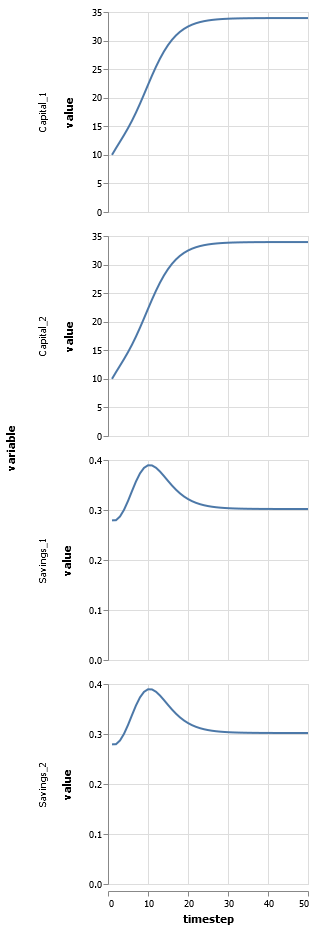

In [6]:
get_table(simres1) |> @vlplot(:line, x=:timestep, y=:value, row="variable:n", resolve={scale={y=:independent}})

## Problem 2

In [7]:
include("problem2.jl")

getproblem2 (generic function with 2 methods)

In [8]:
p2 = getproblem2()

Dynamic programming problem with
  2 state variables
    State 1: 10 nodes over [1.0, 100.0]
    State 2: 10 nodes over [1.0, 100.0]
  4 choice variables
    Choice 1: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 2: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 3: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 4: bounds [0.0, 1.0e11] with initial value 0.1
  2 constraints
    Constraint 1: bounds [0.0, Inf] 
    Constraint 2: bounds [0.0, Inf] 
  0 uncertain parameters


In [9]:
res2 = solve(p2)

Function iteration converged after 369 iterations with max. coefficient difference of 0.000991742949906893


Dynamic programming solution

In [10]:
simres2 = simulate(res2, 50, 0);

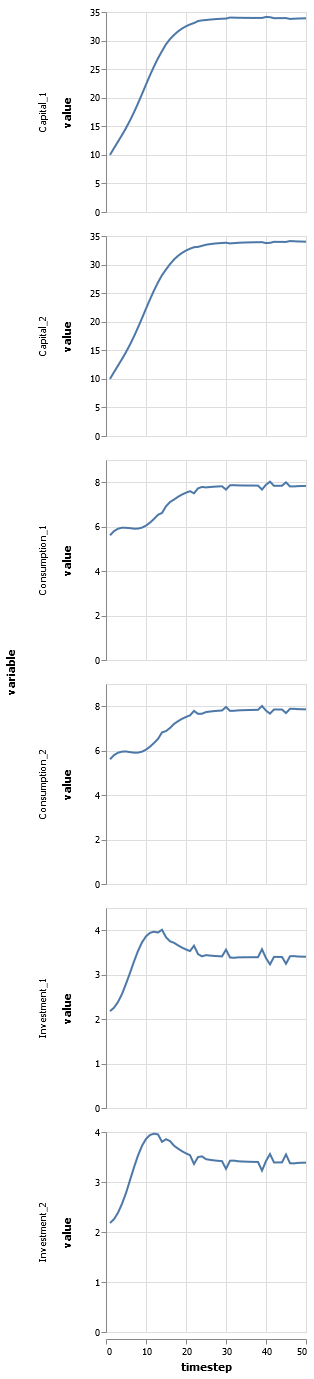

In [11]:
get_table(simres2) |> @vlplot(:line, x=:timestep, y=:value, row="variable:n", resolve={scale={y=:independent}})

## Problem 3

- Deterministic NGM with energy as third production factor
- energy is produced using labor, with one unit of energy costing 1/ρ units of labor


In [9]:
include("problem3.jl")

getproblem3 (generic function with 1 method)

In [10]:
p3 = getproblem3()

Dynamic programming problem with
  1 state variables
    State 1: 10 nodes over [0.7, 1.3]
  4 choice variables
    Choice 1: bounds [0.0, 1.0e11] with initial value 1.0
    Choice 2: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 3: bounds [0.0, 1.0e11] with initial value 0.5
    Choice 4: bounds [0.0, 1.0e11] with initial value 0.1
  1 constraints
    Constraint 1: bounds [0.0, Inf] 
  0 uncertain parameters


In [11]:
res3 = solve(p3)

Function iteration converged after 73 iterations with max. coefficient difference of 0.000991225645979199


Dynamic programming solution

In [12]:
simres3 = simulate(res3, 50, 0);

In [20]:
# get_table(simres3) |> @vlplot(:line, x=:timestep, y=:value, row="variable:n", resolve={scale={y=:independent}})

## Problem 4

In [12]:
include("problem4.jl")

getproblem4 (generic function with 1 method)

In [13]:
p4 = getproblem4()

Dynamic programming problem with
  2 state variables
    State 1: 10 nodes over [0.7, 1.3]
    State 2: 10 nodes over [0.8853, 1.1295]
  3 choice variables
    Choice 1: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 2: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 3: bounds [0.0, 1.0e11] with initial value 0.1
  1 constraints
    Constraint 1: bounds [0.0, Inf] 
  1 uncertain parameters


In [14]:
res4 = solve(p4)

Function iteration converged after 33 iterations with max. coefficient difference of 0.00089984178864988


Dynamic programming solution

In [23]:
simres4 = simulate(res4, 50, 100)

Judyp simulation result for 100 Monte Carlo runs and 50 time periods.

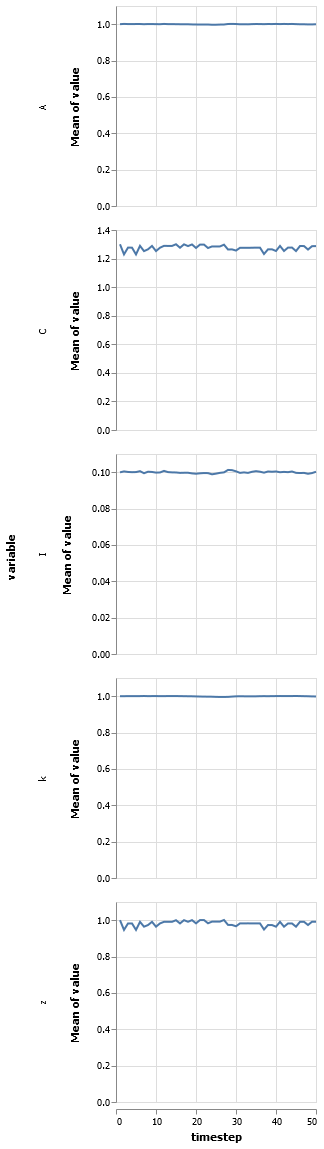

In [25]:
get_table(simres4) |> @vlplot(:line, x=:timestep, y="mean(value)", row="variable:n", resolve={scale={y=:independent}})

## Problem 5

- NGM with two capital stocks, denoted by k and q 
- investment decisions in k and q are made one period in advance
- Cobb-Douglas production function with labor and a CES composite of k and q, with EoS given by σ

In [13]:
include("problem5.jl")

getproblem5 (generic function with 1 method)

In [16]:
p5 = getproblem5()

Dynamic programming problem with
  2 state variables
    State 1: 10 nodes over [0.3, 0.8]
    State 2: 10 nodes over [0.3, 0.8]
  4 choice variables
    Choice 1: bounds [0.0, 1.0e11] with initial value 0.5
    Choice 2: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 3: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 4: bounds [0.0, 1.0e11] with initial value 1.0
  1 constraints
    Constraint 1: bounds [0.0, Inf] 
  0 uncertain parameters


In [17]:
res5 = solve(p5)

Function iteration converged after 73 iterations with max. coefficient difference of 0.000977493594145784


Dynamic programming solution

In [18]:
simres5 = simulate(res5, 50, 0);

In [19]:
# get_table(simres1) |> @vlplot(:line, x=:timestep, y=:value, row="variable:n", resolve={scale={y=:independent}})